# Before the start change the name of the images!!

In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import torch
import matplotlib.pyplot as plt
import pathlib
import torch.nn.functional as F
from ssd.utils import load_config
from glob import glob

In [2]:
cfg = load_config("../configs/tdt4265.py")
logs = tops.logger.read_logs(pathlib.Path("../outputs/tdt4265"))

It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/nicolob
	If you struggle with NTNU home directory becoming full, we recommend you to change the output directory to: /work/snotra/nicolob
	 /work/snotra/nicolob does not sync with NTNU HOME, and is a directory only located on the server.
	 To change the output directory of SSD, set save_in_work to True in the file configs/utils.py, in the function get_output_dir.
Saving SSD outputs to: outputs/
Found dataset directory in: /work/datasets/mnist_object_detection/train
Found dataset directory in: /work/datasets/mnist_object_detection/val
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/train_annotations.json
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/val_annotations.json


In [3]:
# The log is formatted as a list of dictionaries
print(logs[:10])

[{'loss/regression_loss': 3.4264042377471924, 'loss/classification_loss': 0.1202211081981659, 'loss/total_loss': 3.5466253757476807, 'global_step': 0}, {'stats/learning_rate': 0.00026936, 'global_step': 1}, {'stats/learning_rate': 0.00027404, 'global_step': 2}, {'stats/learning_rate': 0.00027872000000000004, 'global_step': 3}, {'stats/learning_rate': 0.00028340000000000006, 'global_step': 4}, {'stats/learning_rate': 0.00028808, 'global_step': 5}, {'stats/learning_rate': 0.00029276000000000004, 'global_step': 6}, {'stats/learning_rate': 0.00029744, 'global_step': 7}, {'stats/learning_rate': 0.00030212, 'global_step': 8}, {'stats/learning_rate': 0.00030680000000000003, 'global_step': 9}]


In [4]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = [entry for entry in logs if "loss/regression_loss" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

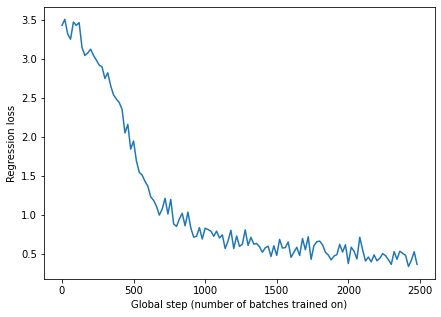

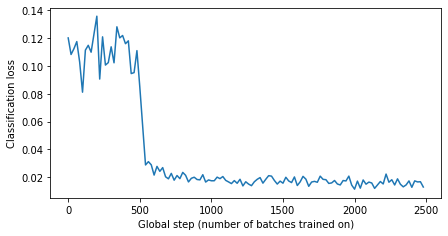

In [5]:
#Count plots in folder in order to put different names
dir_path = glob(os.getcwd() + "/*/", recursive = True)[0]
nfile = int(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])/2)

fig = plt.figure(figsize=(7,5))
plt.plot([entry["global_step"] for entry in loss_entries], [entry["loss/regression_loss"] for entry in loss_entries])
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")
#fig.savefig('Loss plots/reg_loss_ResNet'+str(nfile) +'.png',dpi = 300, bbox_inches='tight')

fig = plt.figure(figsize=(7,3.5))
plt.plot([entry["global_step"] for entry in loss_entries], [entry["loss/classification_loss"] for entry in loss_entries])
plt.ylabel("Classification loss")
plt.xlabel("Global step (number of batches trained on)")
#fig.savefig('Loss plots/class_loss_ResNet'+str(nfile) +'.png',dpi = 300, bbox_inches='tight')

/home/nicolob/TDT4265_CV-DL_Project/Starter_Code/assignment4/SSD/notebooks/Loss plots/
2


In [5]:

m1 = torch.zeros(1,53)


print(m1)

m1[0,0:6] = 0.5

print(m1)



tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.]])
tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
